## Латиков Александр, задача 11.9.5

Задача - необходимо решить периодический диффур:

y" - P(x)^2 * y = f(x) 

Период T = 1

P(x)^2 = 10 + sin(2pix)

f(x) = cos(2pix)

Для решения задачи используется метод прогонки для периодических граничных условий. Взял отсюда http://www.mathnet.ru/links/108b12324441e65bf8e349f4ae493ef1/zvmmf7856.pdf

In [1]:
import numpy as np              
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
h = 0.0001
N = 10000

def P2(x):
    return 10 + np.sin(2 * np.pi * x)

def f(x):
    return np.cos(2 * np.pi * x)

In [3]:
def M(N):
    M = np.zeros(N * N, dtype = float).reshape(N, N)
    for i in range(N):
        M[i][(i + N - 1) % N] = 1.0 / (h ** 2)
        M[i][i] = -2.0 / (h ** 2) - P2(i * h)
        M[i][(i + 1) % N] = 1.0 / (h ** 2)
    return M

def k(N):
    b = np.zeros(N, dtype = float)
    for i in range(N):
        b[i] = f(i * h)
    return b

In [4]:
def diag_solve(A, b):
    n = b.size
    for i in range(1, n):
        k = A[i][i - 1] / A[i - 1][i - 1]
        A[i][i - 1] = 0.0
        A[i][i] -= k * A[i - 1][i]
        b[i] -= k * b[i - 1]
        
    b[n - 1] /= A[n - 1][n - 1]
    
    for j in range(1, n):
        i = n - j - 1
        b[i] -= A[i][i + 1] * b[i + 1]
        b[i] /= A[i][i]
        
    return b

In [5]:
A = np.array([[2.0, 1.0, 0.0], [1.0, 2.0, 1.0], [0.0, 2.0, 3.0]])
b = np.array([2.0, 2.0, 3.0])
print(diag_solve(A, b))

[1. 0. 1.]


In [8]:
A = M(N)
b = k(N)

A1 = np.zeros((N - 1) * (N - 1), dtype = float).reshape((N - 1), (N - 1))
for i in range(N - 1):
    for j in range(N - 1):
        A1[i][j] = A[i][j]
        
b1 = np.zeros(N - 1, dtype = float)
for i in range(N - 1):
    b1[i] = b[i]
    
u1 = np.zeros(N - 1, dtype = float)
u1[0] = -A[0][N - 1]
u1[N - 2] = -A[N - 2][N - 1]

p1 = diag_solve(np.copy(A1), np.copy(b1))
q1 = diag_solve(np.copy(A1), np.copy(u1))

y = np.zeros(N, dtype = float)
y[N - 1] = (-b[N - 1] + A[N - 1][0] * p1[0] + A[N - 1][N - 2] * p1[N - 2]) / (-A[N - 1][N - 1] - A[N - 1][0] * q1[0] - A[N - 1][N - 2] * q1[N - 2])
for j in range(N - 1):
    i = N - j - 2
    y[i] = p1[i] + y[N - 1] * q1[i]

for i in range(y.size):
    print(y[i])

-0.020211358628910586
-0.020211279009866107
-0.020211191412078496
-0.02021109583567191
-0.02021099228077364
-0.020210880747514134
-0.020210761236027
-0.02021063374644897
-0.02021049827891995
-0.02021035483358297
-0.02021020341058423
-0.02021004401007305
-0.020209876632201928
-0.020209701277126485
-0.020209517945005497
-0.020209326636000887
-0.02020912735027772
-0.020208920088004213
-0.020208704849351732
-0.02020848163449478
-0.020208250443611013
-0.02020801127688122
-0.02020776413448935
-0.020207509016622476
-0.02020724592347085
-0.020206974855227836
-0.02020669581208995
-0.020206408794256867
-0.020206113801931387
-0.020205810835319464
-0.020205499894630188
-0.020205180980075805
-0.02020485409187169
-0.02020451923023636
-0.020204176395391484
-0.020203825587561876
-0.020203466806975476
-0.020203100053863377
-0.020202725328459813
-0.020202342631002155
-0.020201951961730913
-0.020201553320889742
-0.020201146708725443
-0.02020073212548795
-0.02020030957143033
-0.0201998790468088
-0.0201994

-0.015168233421381004
-0.015159870201031872
-0.015151501066298596
-0.015143126020496729
-0.015134745066944032
-0.015126358208960498
-0.015117965449868334
-0.015109566792991976
-0.01510116224165806
-0.015092751799195451
-0.015084335468935218
-0.015075913254210658
-0.015067485158357263
-0.015059051184712752
-0.015050611336617047
-0.015042165617412274
-0.015033714030442766
-0.015025256579055067
-0.015016793266597918
-0.015008324096422271
-0.014999849071881266
-0.01499136819633025
-0.014982881473126777
-0.014974388905630588
-0.014965890497203618
-0.014957386251210002
-0.014948876171016071
-0.014940360259990345
-0.014931838521503532
-0.014923310958928532
-0.014914777575640432
-0.014906238375016506
-0.014897693360436209
-0.014889142535281183
-0.014880585902935258
-0.014872023466784432
-0.014863455230216895
-0.014854881196623006
-0.01484630136939531
-0.014837715751928519
-0.014829124347619528
-0.0148205271598674
-0.014811924192073367
-0.014803315447640835
-0.014794700929975379
-0.014786080642

-0.003080834798019242
-0.0030683570826130196
-0.003055878177267544
-0.003043398086824316
-0.0030309168161252696
-0.003018434370012769
-0.0030059507533296195
-0.002993465970919049
-0.0029809800276247144
-0.0029684929282906922
-0.0029560046777614927
-0.0029435152808820406
-0.002931024742497684
-0.0029185330674541873
-0.0029060402605977347
-0.0028935463267749217
-0.002881051270832758
-0.0028685550976186684
-0.0028560578119804815
-0.0028435594187664354
-0.002831059922825176
-0.002818559329005753
-0.0028060576421576177
-0.002793554867130621
-0.002781051008775015
-0.002768546071941448
-0.002756040061480962
-0.0027435329822449953
-0.002731024839085371
-0.0027185156368543153
-0.002706005380404426
-0.0026934940745887044
-0.0026809817242605255
-0.0026684683342736455
-0.002655953909482211
-0.002643438454740738
-0.0026309219749041293
-0.0026184044748276524
-0.0026058859593669614
-0.002593366433378071
-0.0025808459017173744
-0.002568324369241629
-0.0025558018408079614
-0.002543278321273861
-0.00253

0.009239721980720754
0.009250955167594884
0.00926218476032088
0.009273410754517005
0.00928463314580286
0.009295851929799365
0.009307067102128782
0.0093182786584147
0.00932948659428205
0.009340690905357097
0.00935189158726745
0.009363088635642053
0.009374282046111196
0.009385471814306512
0.009396657935860983
0.009407840406408937
0.009419019221586049
0.009430194377029348
0.009441365868377212
0.009452533691269378
0.009463697841346935
0.009474858314252328
0.009486015105629369
0.009497168211123222
0.009508317626380419
0.009519463347048847
0.00953060536877777
0.009541743687217817
0.009552878298020984
0.009564009196840634
0.00957513637933151
0.009586259841149719
0.009597379577952756
0.009608495585399482
0.009619607859150146
0.009630716394866365
0.00964182118821115
0.009652922234848886
0.009664019530445357
0.009675113070667722
0.009686202851184536
0.009697288867665734
0.00970837111578265
0.009719449591208008
0.009730524289615938
0.009741595206681955
0.009752662338082974
0.009763725679497315
0.

0.018769749307183437
0.018774446083156312
0.018779135495854464
0.01878381754336133
0.018788492223763144
0.01879315953514899
0.01879781947561078
0.018802472043243257
0.018807117236144005
0.018811755052413448
0.018816385490154824
0.018821008547474233
0.018825624222480596
0.018830232513285687
0.018834833418004106
0.018839426934753285
0.018844013061653522
0.01884859179682794
0.0188531631384025
0.018857727084506032
0.018862283633270187
0.018866832782829468
0.018871374531321226
0.018875908876885665
0.018880435817665825
0.018884955351807592
0.018889467477459718
0.018893972192773792
0.018898469495904253
0.0189029593850084
0.018907441858246384
0.018911916913781208
0.01891638454977872
0.01892084476440764
0.018925297555839535
0.018929742922248832
0.018934180861812804
0.018938611372711606
0.018943034453128237
0.018947450101248556
0.018951858315261284
0.018956259093358
0.018960652433733165
0.018965038334584072
0.018969416794110912
0.018973787810516705
0.018978151382007376
0.018982507506791695
0.018

0.019067572900813304
0.019063348524574503
0.01905911657726424
0.01905487706048368
0.01905062997583703
0.019046375324931582
0.01904211310937768
0.0190378433307887
0.019033565990781116
0.019029281090974424
0.019024988632991194
0.019020688618457054
0.01901638104900067
0.019012065926253777
0.01900774325185116
0.019003413027430655
0.01899907525463316
0.018994729935102615
0.018990377070486016
0.018986016662433415
0.018981648712597915
0.018977273222635666
0.018972890194205866
0.01896849962897075
0.018964101528595637
0.01895969589474886
0.018955282729101817
0.018950862033328943
0.018946433809107734
0.018941998058118723
0.018937554782045486
0.018933103982574646
0.018928645661395876
0.018924179820201885
0.018919706460688423
0.018915225584554298
0.018910737193501344
0.01890624128923444
0.018901737873461506
0.018897226947893503
0.01889270851424444
0.01888818257423136
0.018883649129574343
0.0188791081819965
0.018874559733223994
0.018870003784986017
0.018865440339014796
0.018860869397045597
0.018856

0.008847720756157945
0.008836239805268885
0.008824755309894012
0.008813267274623067
0.008801775704047289
0.00879028060275939
0.008778781975353568
0.008767279826425506
0.00875577416057236
0.008744264982392768
0.008732752296486837
0.008721236107456157
0.00870971641990378
0.008698193238434227
0.008686666567653491
0.008675136412169032
0.008663602776589762
0.008652065665526076
0.008640525083589805
0.008628981035394258
0.008617433525554186
0.008605882558685801
0.008594328139406767
0.008582770272336194
0.00857120896209464
0.008559644213304117
0.008548076030588075
0.008536504418571412
0.008524929381880458
0.008513350925142988
0.008501769052988209
0.00849018377004677
0.008478595080950746
0.00846700299033365
0.008455407502830416
0.00844380862307741
0.008432206355712426
0.00842060070537468
0.008408991676704804
0.008397379274344854
0.008385763502938307
0.008374144367130042
0.00836252187156637
0.008350896020895
0.008339266819765056
0.008327634272827067
0.008315998384732976
0.008304359160136122
0.00

-0.007469737114048312
-0.007481601251305826
-0.007493462385915769
-0.007505320513130087
-0.007517175628201994
-0.007529027726385966
-0.007540876802937753
-0.007552722853114372
-0.007564565872174122
-0.007576405855376567
-0.007588242797982551
-0.007600076695254199
-0.007611907542454917
-0.0076237353348493925
-0.007635560067703601
-0.007647381736284798
-0.007659200335861531
-0.007671015861703649
-0.007682828309082281
-0.007694637673269852
-0.007706443949540091
-0.007718247133168018
-0.007730047219429959
-0.007741844203603538
-0.007753638080967691
-0.007765428846802654
-0.007777216496389973
-0.0077890010250125045
-0.007800782427954419
-0.007812560700501209
-0.007824335837939664
-0.00783610783555791
-0.007847876688645386
-0.007859642392492854
-0.0078714049423924
-0.00788316433363744
-0.00789492056152271
-0.007906673621344288
-0.007918423508399572
-0.007930170217987302
-0.007941913745407548
-0.007953654085961725
-0.007965391234952584
-0.00797712518768422
-0.00798885593946207
-0.008000583485

-0.016975833506306392
-0.016982745049320184
-0.01698964982253532
-0.01699654782326253
-0.017003439048815325
-0.017010323496509987
-0.01701720116366558
-0.01702407204760395
-0.017030936145649718
-0.017037793455130283
-0.017044643973375847
-0.017051487697719372
-0.017058324625496623
-0.01706515475404614
-0.017071978080709257
-0.01707879460283009
-0.017085604317755538
-0.017092407222835303
-0.017099203315421873
-0.017105992592870524
-0.017112775052539327
-0.01711955069178915
-0.017126319507983646
-0.017133081498489276
-0.01713983666067528
-0.01714658499191372
-0.017153326489579433
-0.017160061151050062
-0.01716678897370607
-0.017173509954930697
-0.017180224092109994
-0.017186931382632817
-0.017193631823890835
-0.017200325413278494
-0.017207012148193073
-0.01721369202603466
-0.017220365044206126
-0.01722703120011317
-0.0172336904911643
-0.017240342914770834
-0.017246988468346897
-0.017253627149309433
-0.017260258955078194
-0.017266883883075745
-0.017273501930727478
-0.017280113095461593
-0

In [9]:
%matplotlib notebook

<IPython.core.display.Javascript object>


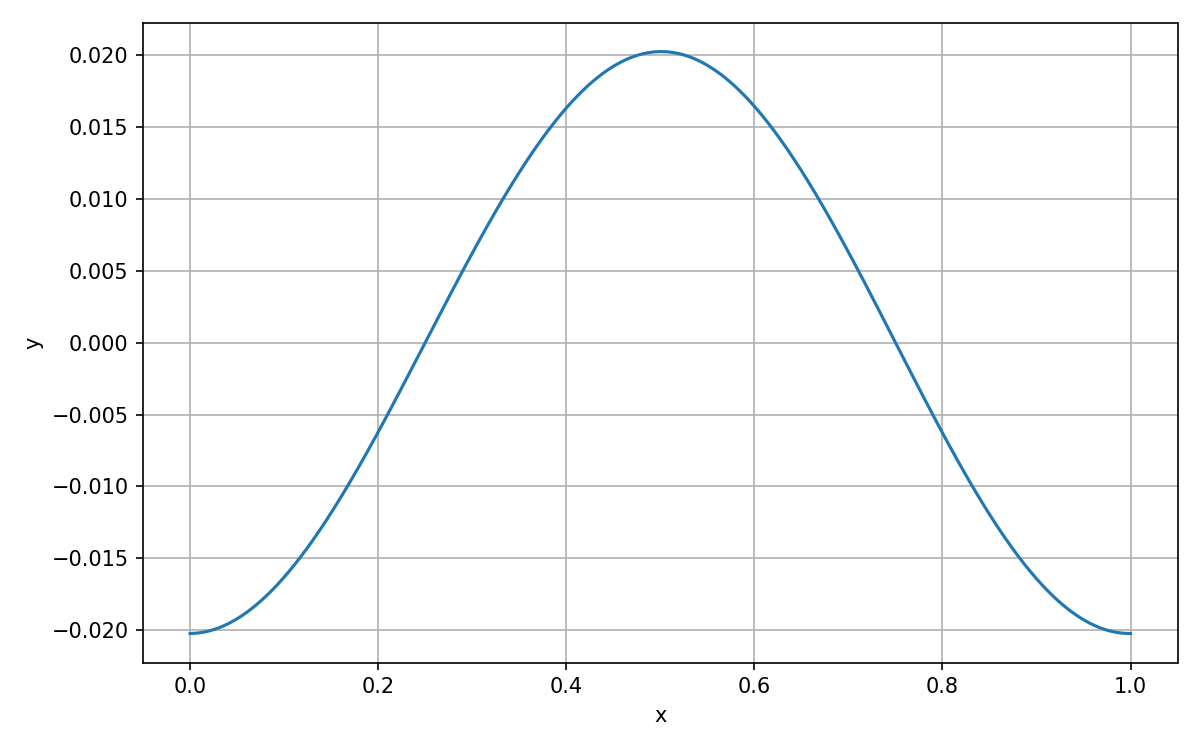

In [10]:
x = np.linspace(0, (N - 1) * h, N)

plt.figure(figsize = [8, 5])
plt.plot(x, y, label = 'y(x)')
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout() 
plt.grid()
plt.show()